## Importing Modules

In [1]:
!pip install scikeras

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## Initial Data Analysis

In [3]:
# Load the dataset
df = pd.read_csv("Rocketium AI_ML Internship Assignment - 2 - Training dataset.csv")

# Distribution of key metrics
df[['spend', 'impressions', 'total engagements']].describe()

,spend,impressions,total engagements
count,1054.000000,1054.000000,1054.000000
mean,213.192998,15075.879507,212.101518
std,1253.414372,67763.338279,360.599591
min,0.000000,0.000000,0.000000
25%,6.615000,803.750000,34.250000
50%,23.645000,2577.000000,110.000000
75%,87.315000,7612.250000,241.000000
max,23039.110000,961453.000000,6291.000000


In [4]:
df.shape

(1054, 57)

In [5]:
# Trends over time
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1054 entries, 2023-09-05 to 2023-08-18
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company name                        1054 non-null   object 
 1   spend                               1054 non-null   float64
 2   impressions                         1054 non-null   int64  
 3   likecount                           1054 non-null   int64  
 4   commentcount                        1054 non-null   int64  
 5   repostcount                         1054 non-null   int64  
 6   total engagements                   1054 non-null   int64  
 7   conversion                          1054 non-null   int64  
 8   action                              1054 non-null   object 
 9   type                                1054 non-null   object 
 10  posturl                             1054 non-null   object 
 11  postcontent              

In [6]:
pd.set_option('display.max_columns', None)
df.describe(include='all')

,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,posturl,postcontent,profileurl,videourl,sharedposturl,created_at,size,url,number of faces,face emotion,face position,face area percentage %,objects,number of objects,primary object,primary object position,primary object area percentage %,secondary object,secondary object position,secondary object area percentage %,text,text length,dominant colour,cta,logos,logo 1 name,logo 1 position,logo 1 area percentage %,logo 2 name,logo 2 position,logo 2 area percentage %,number of persons,person area %,person area,style,tone,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
count,1054,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054,1054,1054,1054,1054,221,244,1054,1054,971,1054.000000,294,294,1054.000000,529,1054.000000,529,529,1054.000000,385,385,1054.000000,608,1054.000000,697,135,359,359,359,1054.000000,47,47,1054.000000,1054.000000,529,1054.000000,232,338,319,340,1054.000000,1054,1054,1054,1054,1054,1054,608
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,7,654,650,8,144,169,42,87,971,NaN,1,9,NaN,275,NaN,59,9,NaN,57,9,NaN,445,NaN,54,48,40,25,9,NaN,12,7,NaN,NaN,3,NaN,2,2,2,2,NaN,4,10,6,4,4,4,4
top,rockwell-automation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Post,Image,https://www.linkedin.com/feed/update/urn:li:ac...,MESA Smart Manufacturing Now! Virtual EventMES...,https://www.linkedin.com/company/rockwell-auto...,https://dms.licdn.com/playlist/vid/D4D10AQGDxy...,https://www.ge.com/sustainability,2023-09-13 9:46:04,100x100,https://rocketium.com/images/cran/prod/assets/...,NaN,Joy,top-right,NaN,Building,NaN,Person,center,NaN,Person,center,NaN,Solve Issues|Faster with|TechConnect|KNOW MORE...,NaN,darkslategray,CLICK NOW TO READ,Rockwell Automation,Rockwell Automation,top-left,NaN,Schneider Electric,bottom-left,NaN,NaN,small,NaN,Modern,Informative,Friendly,Positive,NaN,> 40%,Offerings,English,0,0,0,> 60
freq,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1048,559,2,4,322,2,3,50,354,1,NaN,294,60,NaN,30,NaN,298,175,NaN,160,76,NaN,8,NaN,198,20,115,118,100,NaN,22,19,NaN,NaN,238,NaN,231,315,173,317,NaN,880,364,1038,760,732,525,402
mean,NaN,213.192998,15075.879507,197.481973,2.911765,11.707780,212.101518,34.914611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.777989,NaN,NaN,0.644928,NaN,1.817837,NaN,NaN,12.695187,NaN,NaN,4.379151,NaN,68.045541,NaN,NaN,NaN,NaN,NaN,1.214036,NaN,NaN,0.117452,0.861480,NaN,13.327576,NaN,NaN,NaN,NaN,7.204507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1253.414372,67763.338279,343.418407,8.764124,19.993921,360.599591,61.291577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.899180,NaN,NaN,1.900660,NaN,2.688484,NaN,NaN,22.180729,NaN,NaN,11.035399,NaN,182.270990,NaN,NaN,NaN,NaN,NaN,6.813438,NaN,NaN,1.089433,1.910578,NaN,25.736842,NaN,NaN,NaN,NaN,19.542672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,6.615000,803.750000,33.000000,0.000000,1.000000,34.250000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,23.645000,2577.000000,98.500000,0.000000,5.000000,110.000000,13.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.475000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,87.315000,7612.250000,220.000000,2.000000,14.000000,241.000000,39.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN

In [7]:
df.head(5)

,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,posturl,postcontent,profileurl,videourl,sharedposturl,created_at,size,url,number of faces,face emotion,face position,face area percentage %,objects,number of objects,primary object,primary object position,primary object area percentage %,secondary object,secondary object position,secondary object area percentage %,text,text length,dominant colour,cta,logos,logo 1 name,logo 1 position,logo 1 area percentage %,logo 2 name,logo 2 position,logo 2 area percentage %,number of persons,person area %,person area,style,tone,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-09-05,schneider-electric,5.85,479,31,0,2,33,7,Post,Document,https://www.linkedin.com/feed/update/urn:li:ac...,Join us to Understand the basics of harmonics ...,https://www.linkedin.com/company/schneider-ele...,NaN,NaN,2023-09-13 9:46:04,100x100,NaN,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0,NaN,0.000000,NaN,Informative,Professional,Positive,0.00,> 40%,Offerings,English,0,0,0,NaN
2023-09-01,schneider-electric,1.80,3880,224,1,9,234,0,Post,Image,https://www.linkedin.com/feed/update/urn:li:ac...,"When challenges arise, Schneider Electric Exch...",https://www.linkedin.com/company/schneider-ele...,NaN,NaN,2023-09-13 9:46:04,800x420,https://rocketium.com/images/cran/prod/assets/...,0,NaN,NaN,0.000000,Building,1,Building,center,57.181154,NaN,NaN,0.000000,Life Is On Schneider|Electric|controlsee,37,darkslategray,NaN,Schneider Electric,Schneider Electric,bottom-left,0.714286,NaN,NaN,0.000000,0,small,0.000000,NaN,NaN,NaN,NaN,1.85,> 40%,Offerings,English,0,0,1,40 to 60
2023-09-04,schneider-electric,2.32,785,55,1,16,72,11,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,Join our webinar on September 19th at 4 PM HKT...,https://www.linkedin.com/company/schneider-ele...,NaN,https://www.linkedin.com/video/event/urn:li:ug...,2023-09-13 9:46:04,100x100,NaN,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0,NaN,0.000000,NaN,Informative,Professional,Positive,0.00,> 40%,Sustainability,English,0,0,0,NaN
2023-09-04,schneider-electric,3.94,658,54,1,5,60,8,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,Join our webinar on September 19th at 5 PM CET...,https://www.linkedin.com/company/schneider-ele...,NaN,https://www.linkedin.com/video/event/urn:li:ug...,2023-09-13 9:46:04,100x100,NaN,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0,NaN,0.000000,NaN,NaN,NaN,NaN,0.00,> 40%,Sustainability,English,0,0,0,NaN
2023-09-04,schneider-electric,3.89,2568,168,1,5,174,25,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,More than 80% of partners have made investment...,https://www.linkedin.com/company/schneider-ele...,https://dms.licdn.com/playlist/vid/D4D10AQGDxy...,NaN,2023-09-13 9:46:04,1200x630,https://rocketium.com/images/cran/prod/assets/...,2,Joy,top-center,4.381481,"Glasses, Person, Person, Tie, Person, Glasses",6,Person,center,54.487621,Person,center,30.206522,Life Is On Schneiderte,21,darkslategray,NaN,"Schneider Electric, Schneider Electric",Schneider Electric,bottom-left,0.761905,Schneider Electric,bottom-left,0.414683,3,large,125.009998,NaN,NaN,NaN,NaN,1.05,10% to 20%,Sustainability,English,2 to 4,2 to 4,5 or more,20 to 40


## EDA-Exploratory Data Analysis

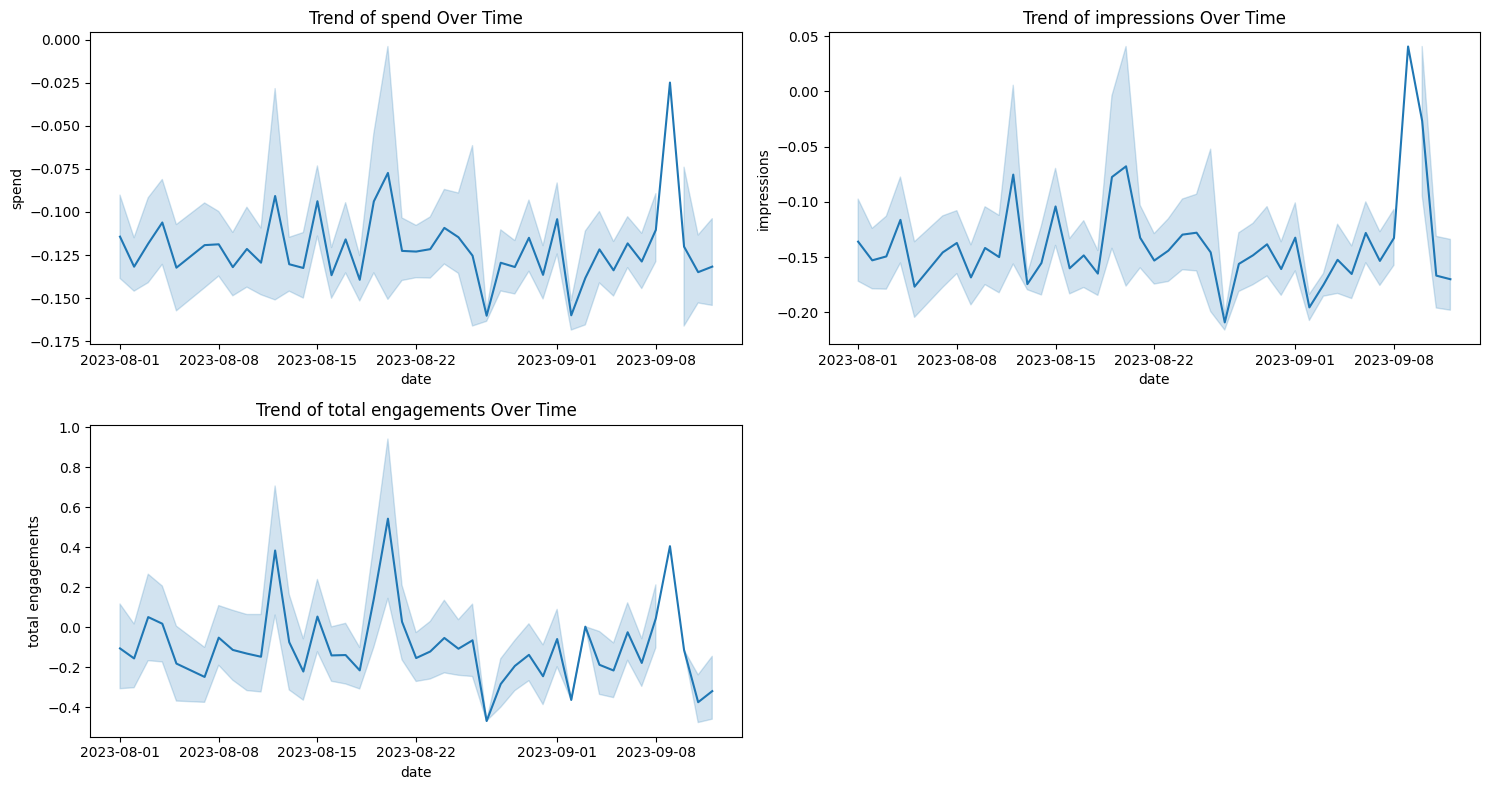

In [33]:
# Trend Analysis for key metrics over time
trend_columns = ['spend', 'impressions', 'total engagements']
plt.figure(figsize=(15, 8))
for i, column in enumerate(trend_columns):
    plt.subplot(2, 2, i + 1)
    sns.lineplot(x='date', y=column, data=df)
    plt.title(f'Trend of {column} Over Time')
plt.tight_layout()

<ipython-input-11-19e5340214aa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


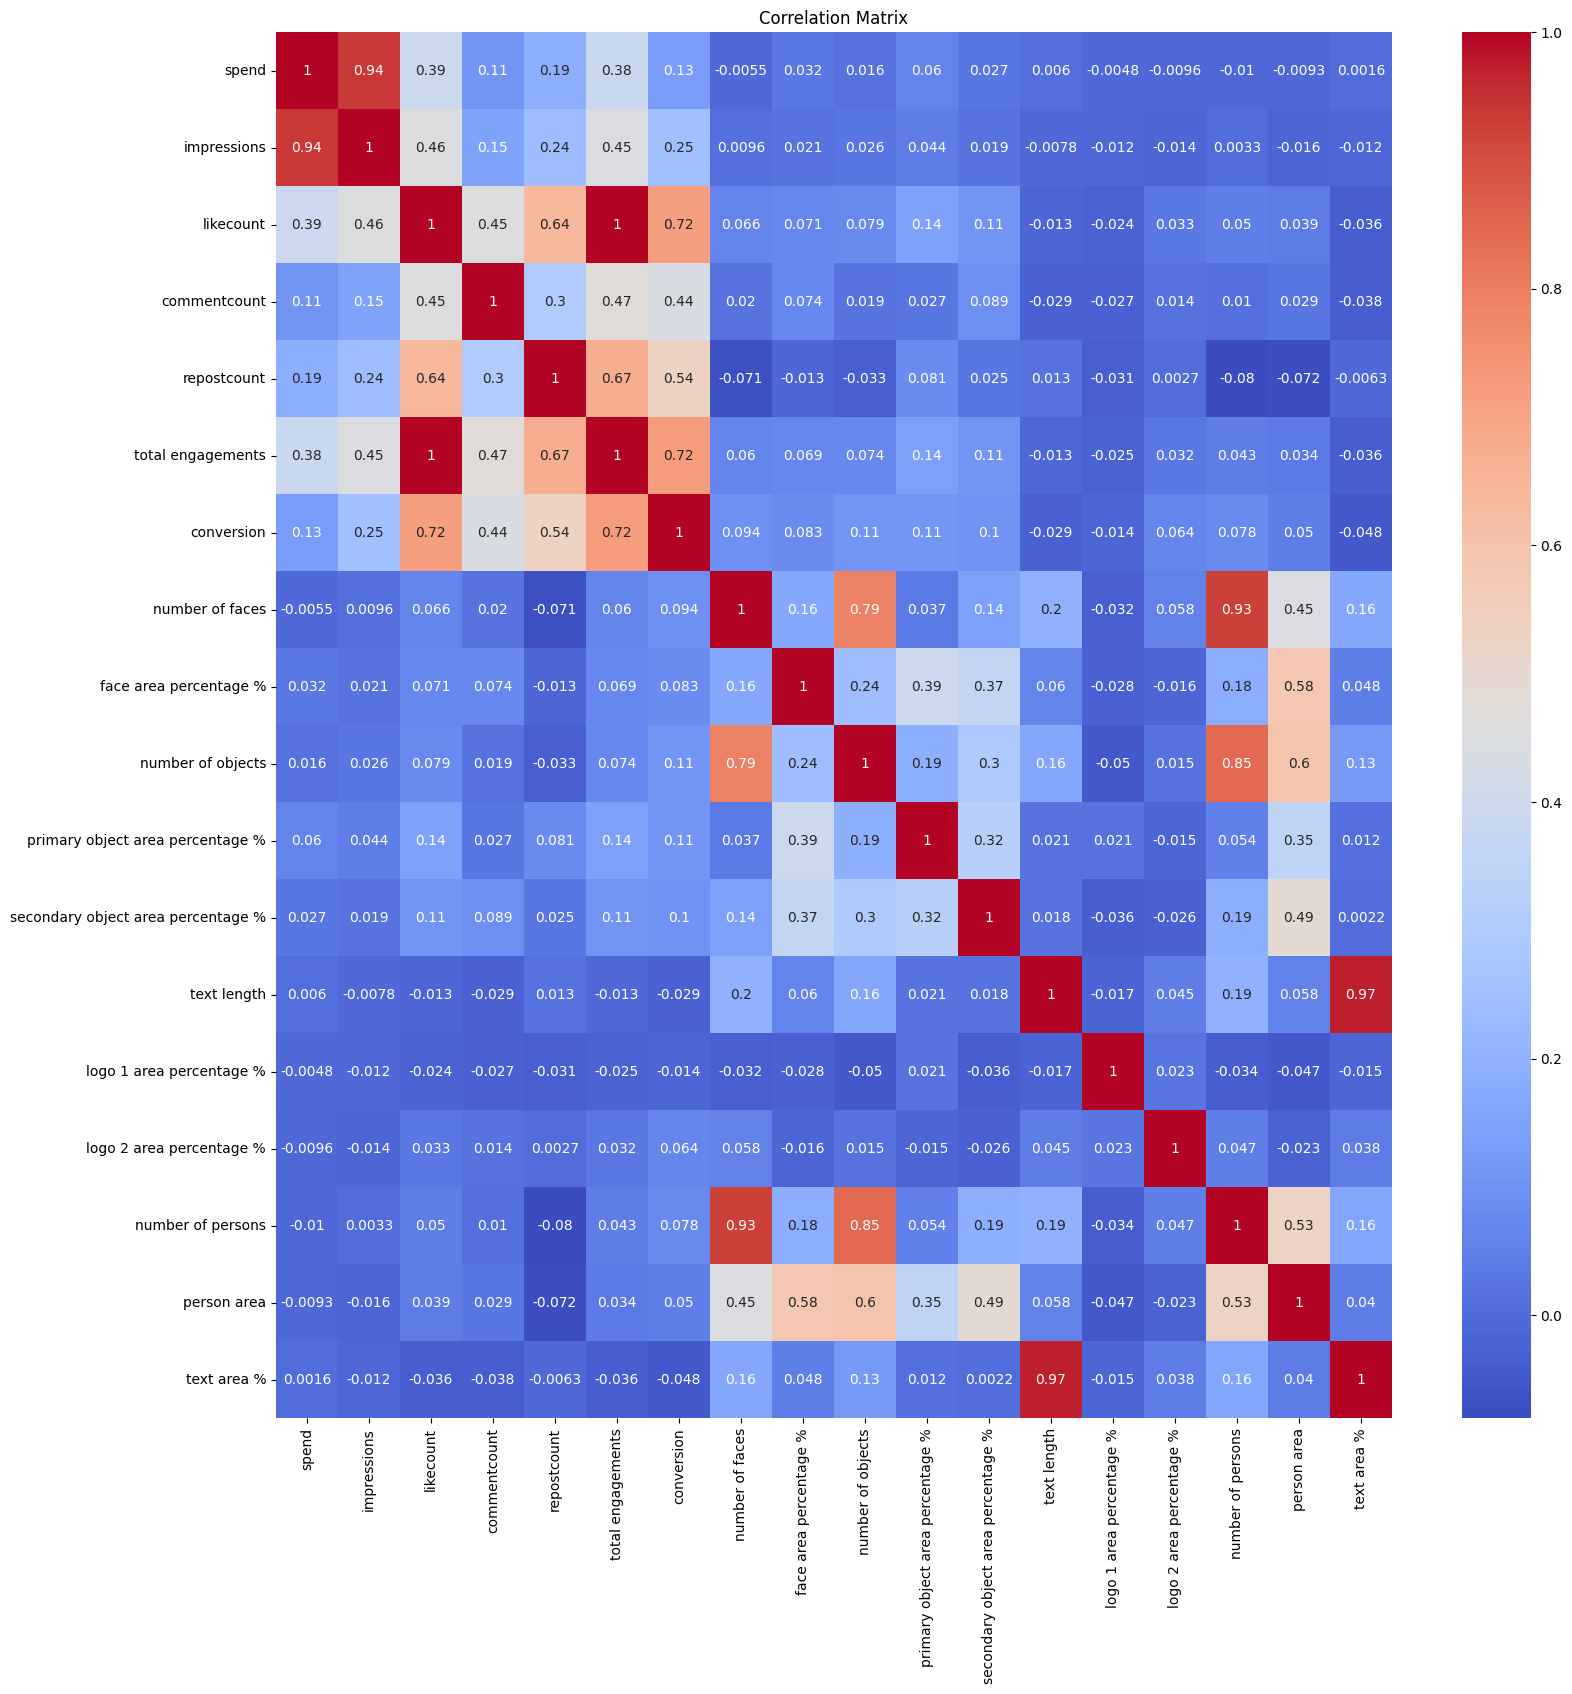

In [11]:
# Correlation matrix
plt.figure(figsize=(18, 18))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

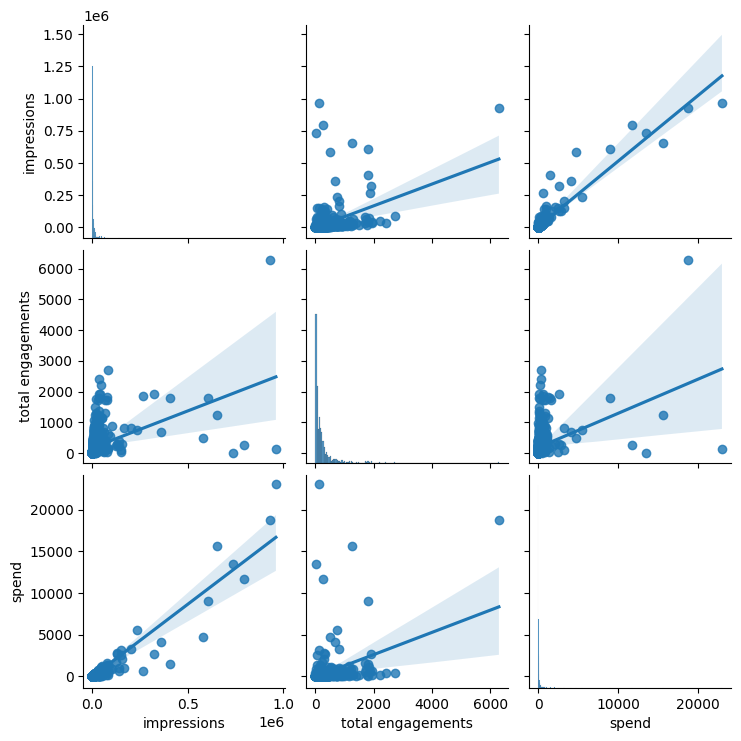

In [9]:
# Pairplot between quantitative cols
sns.pairplot(df[['impressions', 'total engagements', 'spend']], kind='reg')

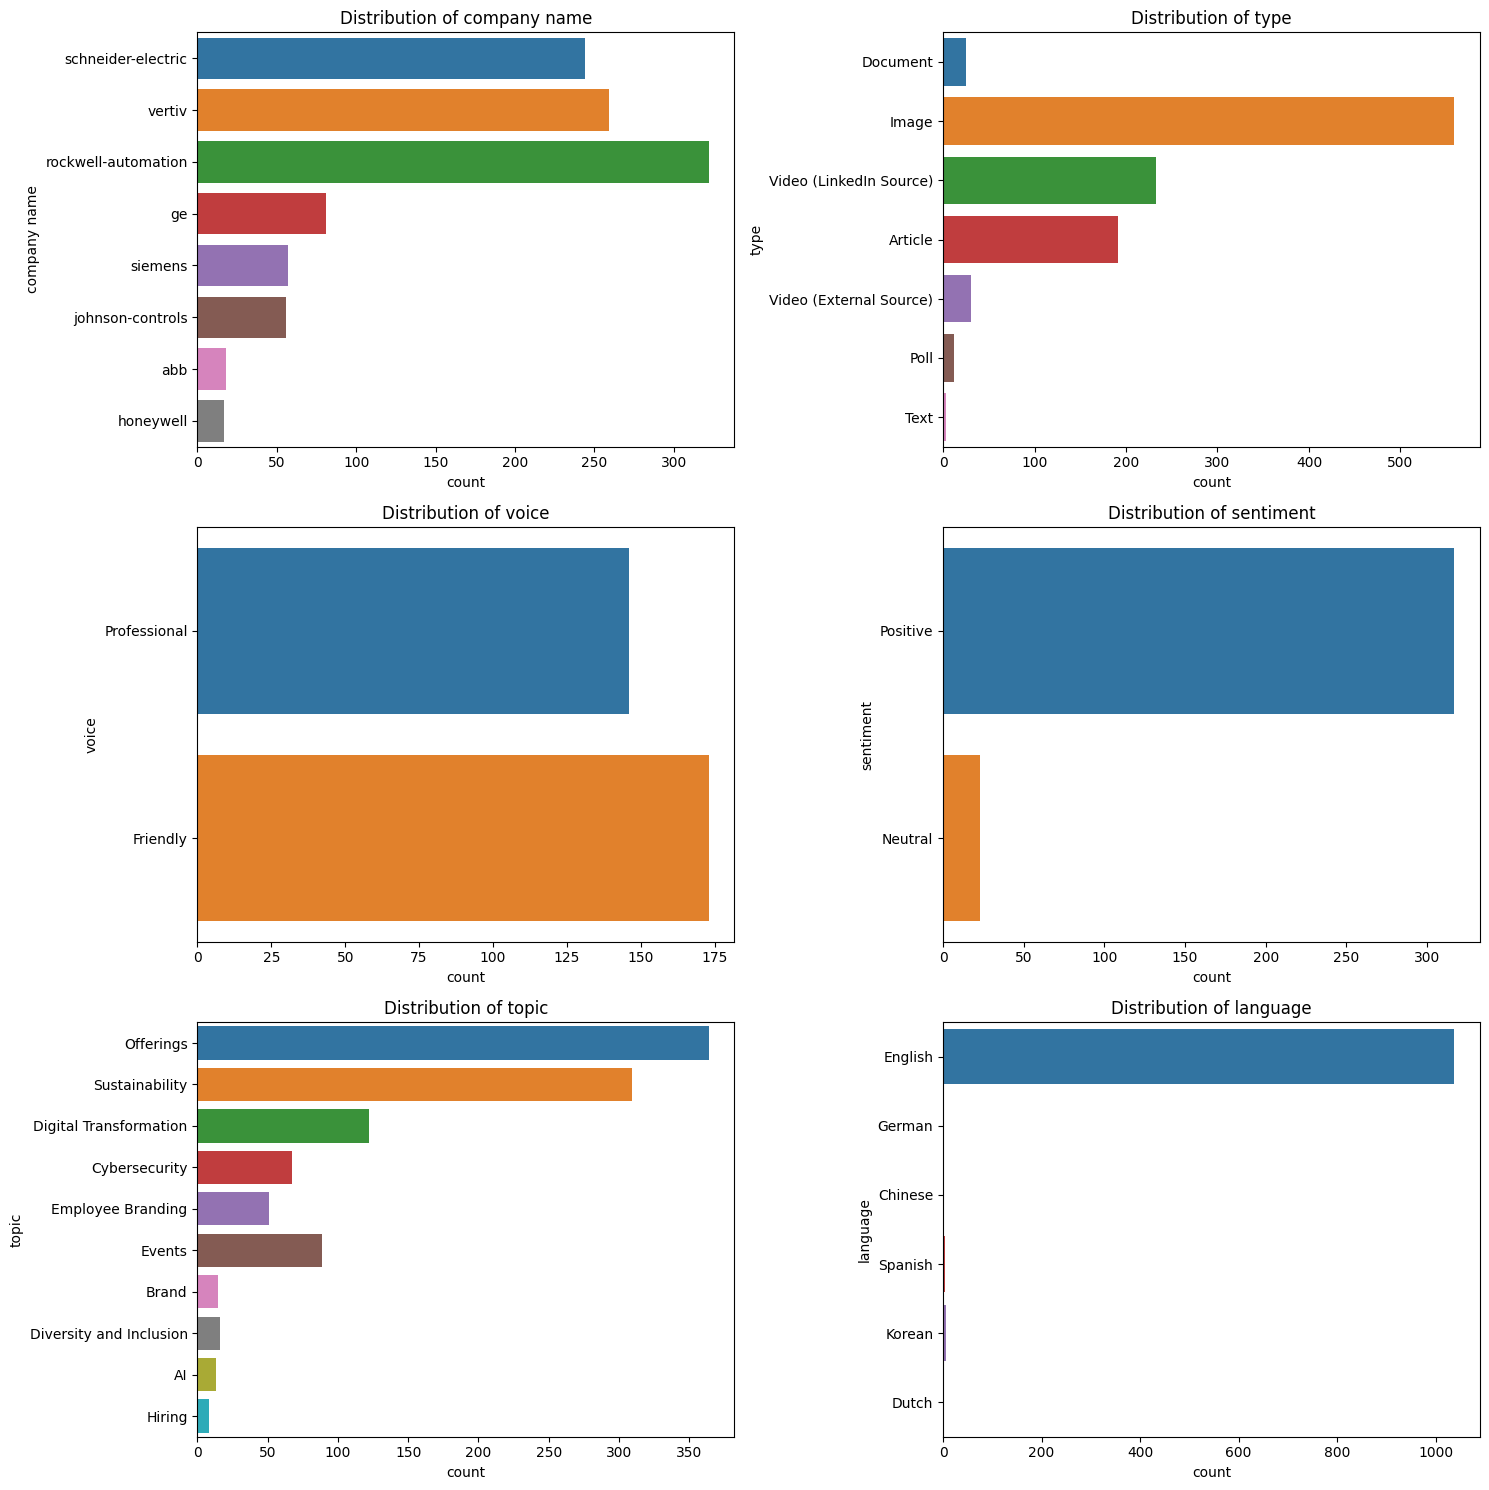

In [10]:
# Categorical Data Analysis
categorical_columns = ['company name', 'type', 'voice', 'sentiment', 'topic', 'language']
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_columns):
    if df[column].nunique() < 20:  # Only plot if there are less than 20 unique values
        plt.subplot(3, 2, i + 1)
        sns.countplot(y=column, data=df)
        plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

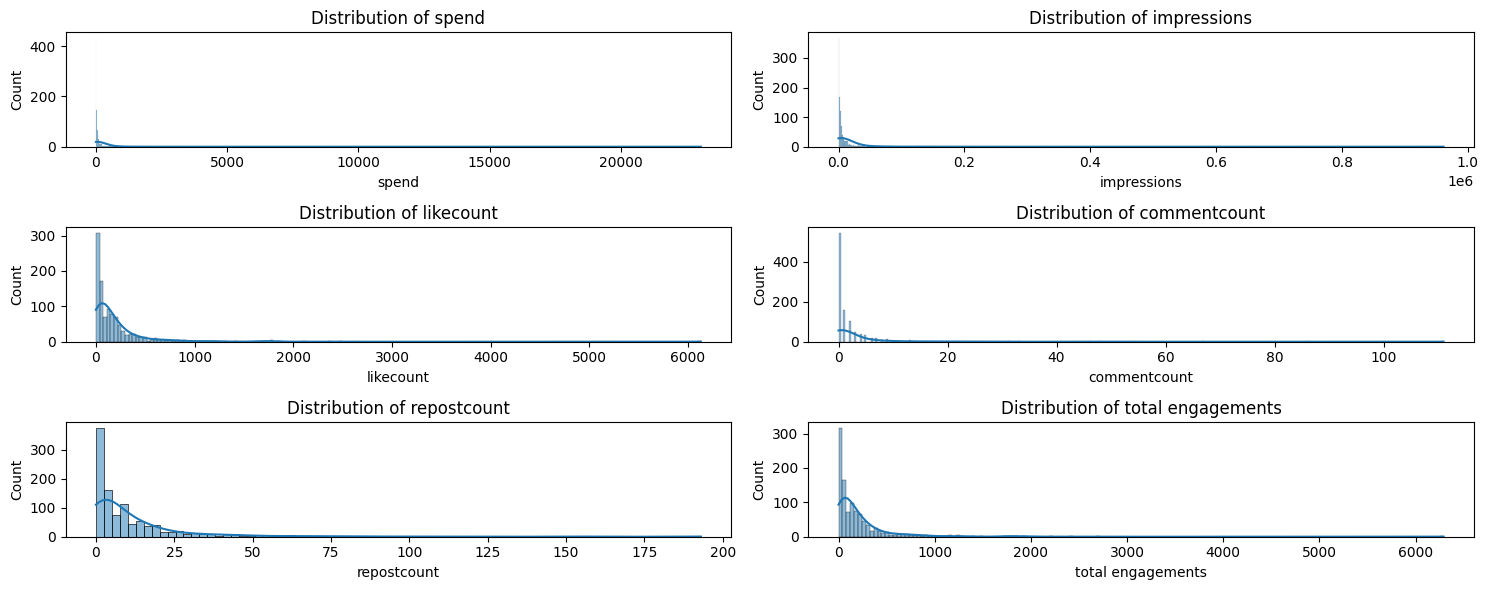

In [11]:
# Analyze Data Distribution for key numerical columns
numerical_columns = ['spend', 'impressions', 'likecount', 'commentcount', 'repostcount', 'total engagements']
plt.figure(figsize=(15, 6))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

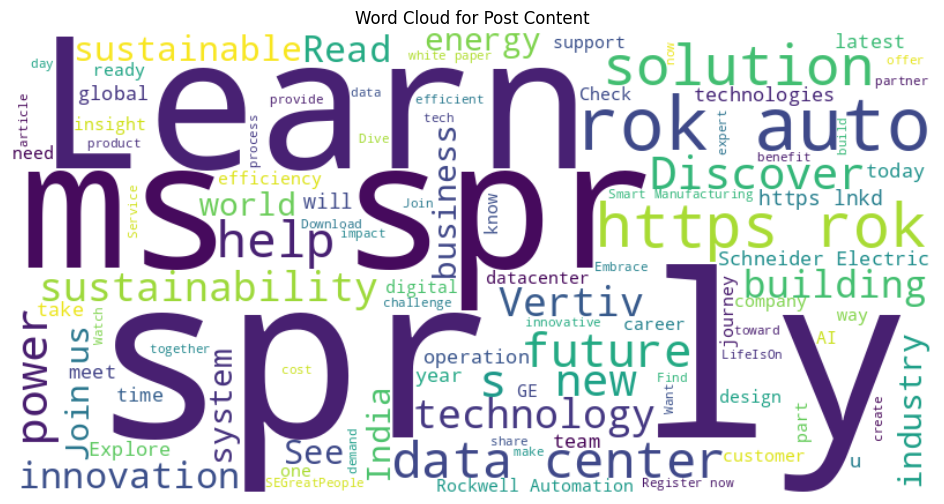

In [12]:
from wordcloud import WordCloud

# Generate and display a word cloud for post content
wordcloud = WordCloud(width=800, height=400, random_state=42, max_words=100, background_color='white').generate(' '.join(df['postcontent']))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Post Content')
plt.show()

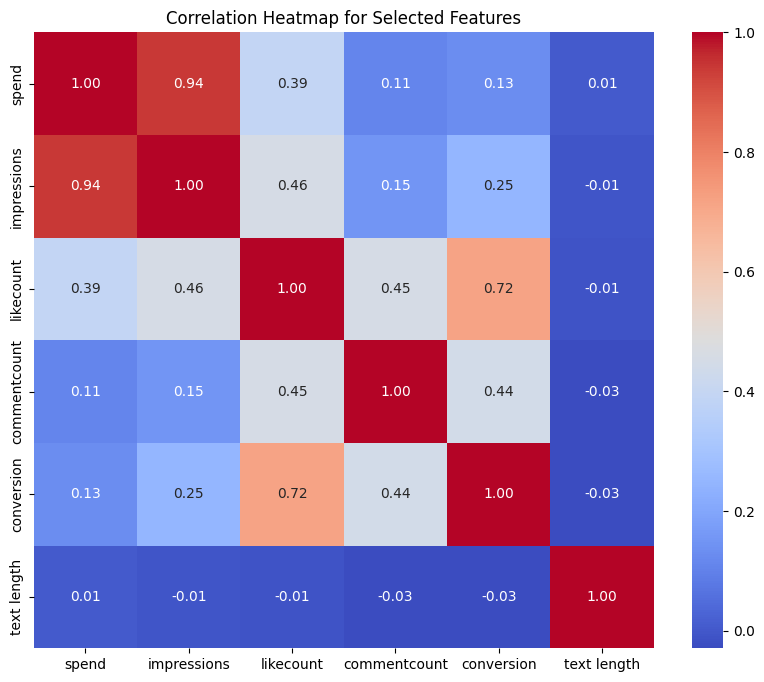

In [13]:
# Selecting relevant features for correlation analysis
selected_features = ['spend', 'impressions', 'likecount', 'commentcount', 'conversion', 'text length']

# Create a subset dataframe with selected features
df_selected = df[selected_features]

# Correlation heatmap for selected features
correlation_matrix_selected = df_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Selected Features')
plt.show()

## Cleaning the dataset

### Handling missing values

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
company name                             0
spend                                    0
impressions                              0
likecount                                0
commentcount                             0
repostcount                              0
total engagements                        0
conversion                               0
action                                   0
type                                     0
posturl                                  0
postcontent                              0
profileurl                               0
videourl                               833
sharedposturl                          810
created_at                               0
size                                     0
url                                     83
number of faces                          0
face emotion                           760
face position                          760
face area percentage %                   0
objects                               

In [15]:
df.replace('NA', pd.NA, inplace=True)

# Function to fill missing values with mean for numerical columns and mode for categorical columns
def fill_missing(column_name):
    if df[column_name].dtype == 'float64' or df[column_name].dtype == 'int64':
        mean_value = df[column_name].mean()
        df[column_name].fillna(mean_value, inplace=True)
    else:
        mode_value = df[column_name].mode()[0]
        df[column_name].fillna(mode_value, inplace=True)

# Iterate through columns and fill missing values with mean or mode
for column in df.columns:
    fill_missing(column)

df.isnull().sum()

company name                          0
spend                                 0
impressions                           0
likecount                             0
commentcount                          0
repostcount                           0
total engagements                     0
conversion                            0
action                                0
type                                  0
posturl                               0
postcontent                           0
profileurl                            0
videourl                              0
sharedposturl                         0
created_at                            0
size                                  0
url                                   0
number of faces                       0
face emotion                          0
face position                         0
face area percentage %                0
objects                               0
number of objects                     0
primary object                        0


## Pre-processing the dataset

### Label encoding the categorical variables

In [16]:
# Import LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Identify columns with categorical data in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    # Transform and replace categorical values with encoded values
    df[column] = label_encoder.fit_transform(df[column])

df.head(5)

,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,posturl,postcontent,profileurl,videourl,sharedposturl,created_at,size,url,number of faces,face emotion,face position,face area percentage %,objects,number of objects,primary object,primary object position,primary object area percentage %,secondary object,secondary object position,secondary object area percentage %,text,text length,dominant colour,cta,logos,logo 1 name,logo 1 position,logo 1 area percentage %,logo 2 name,logo 2 position,logo 2 area percentage %,number of persons,person area %,person area,style,tone,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-09-05,5,5.85,479,31,0,2,33,7,1,1,512,295,5,0,134,16,0,0,0,0,8,0.000000,15,0,39,3,0.000000,37,3,0.000000,108,0,15,0,24,20,7,0.000000,9,1,0.000000,0,2,0.000000,1,0,1,1,0.00,3,8,2,0,0,0,3
2023-09-01,5,1.80,3880,224,1,9,234,0,1,2,472,574,5,0,134,16,54,11,0,0,8,0.000000,15,1,8,3,57.181154,37,3,0.000000,202,37,15,0,26,21,1,0.714286,9,1,0.000000,0,2,0.000000,1,0,0,1,1.85,3,8,2,0,0,1,1
2023-09-04,5,2.32,785,55,1,16,72,11,1,6,495,282,5,0,161,16,0,0,0,0,8,0.000000,15,0,39,3,0.000000,37,3,0.000000,108,0,15,0,24,20,7,0.000000,9,1,0.000000,0,2,0.000000,1,0,1,1,0.00,3,9,2,0,0,0,3
2023-09-04,5,3.94,658,54,1,5,60,8,1,6,493,283,5,0,160,16,0,0,0,0,8,0.000000,15,0,39,3,0.000000,37,3,0.000000,108,0,15,0,24,20,7,0.000000,9,1,0.000000,0,2,0.000000,1,0,0,1,0.00,3,9,2,0,0,0,3
2023-09-04,5,3.89,2568,168,1,5,174,25,1,6,499,335,5,33,134,16,2,9,2,0,6,4.381481,61,6,39,3,54.487621,37,3,30.206522,199,21,15,0,29,21,1,0.761905,9,1,0.414683,3,0,125.009998,1,0,0,1,1.05,0,9,2,2,2,3,0


### Standardisation for the numerical columns

In [17]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns in the encoded dataset
numeric_columns_encoded = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Use StandardScaler for numeric columns in the encoded dataset
scaler_encoded = StandardScaler()
df[numeric_columns_encoded] = scaler_encoded.fit_transform(df[numeric_columns_encoded])

df.head(5)

,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,posturl,postcontent,profileurl,videourl,sharedposturl,created_at,size,url,number of faces,face emotion,face position,face area percentage %,objects,number of objects,primary object,primary object position,primary object area percentage %,secondary object,secondary object position,secondary object area percentage %,text,text length,dominant colour,cta,logos,logo 1 name,logo 1 position,logo 1 area percentage %,logo 2 name,logo 2 position,logo 2 area percentage %,number of persons,person area %,person area,style,tone,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-09-05,0.170195,-0.165501,-0.215512,-0.485009,-0.332395,-0.485767,-0.496913,-0.455656,0.050363,-0.781555,1.057588,-0.134614,0.170195,-0.427097,0.394423,-0.791842,-1.088413,-1.493950,-0.409839,0.0,0.474941,-0.339479,-0.694361,-0.676478,0.354498,-0.286025,-0.572624,0.306097,-0.134523,-0.397016,-0.596426,-0.373498,-0.240318,-0.303636,-0.084724,0.081318,0.459817,-0.178267,0.08544,-0.136225,-0.107862,-0.451114,0.583919,-0.518086,0.030817,-0.14936,2.493828,0.14936,-0.368830,0.408205,0.492047,-0.082934,-0.554039,-0.588873,-0.889296,0.435070
2023-09-01,0.170195,-0.168734,-0.165299,0.077254,-0.218239,-0.135494,0.060757,-0.569918,0.050363,-0.294124,0.839280,1.348822,0.170195,-0.427097,0.394423,-0.791842,0.735360,-1.457171,-0.409839,0.0,0.474941,-0.339479,-0.694361,-0.304344,-2.809352,-0.286025,2.006566,0.306097,-0.134523,-0.397016,0.253848,-0.170407,-0.240318,-0.303636,0.382809,0.444493,-2.333540,-0.073383,0.08544,-0.136225,-0.107862,-0.451114,0.583919,-0.518086,0.030817,-0.14936,-0.400990,0.14936,-0.274121,0.408205,0.492047,-0.082934,-0.554039,-0.588873,-0.005034,-2.126739
2023-09-04,0.170195,-0.168319,-0.210994,-0.415090,-0.218239,0.214778,-0.388708,-0.390363,0.050363,1.655601,0.964807,-0.203735,0.170195,-0.427097,1.178202,-0.791842,-1.088413,-1.493950,-0.409839,0.0,0.474941,-0.339479,-0.694361,-0.676478,0.354498,-0.286025,-0.572624,0.306097,-0.134523,-0.397016,-0.596426,-0.373498,-0.240318,-0.303636,-0.084724,0.081318,0.459817,-0.178267,0.08544,-0.136225,-0.107862,-0.451114,0.583919,-0.518086,0.030817,-0.14936,2.493828,0.14936,-0.368830,0.408205,0.886434,-0.082934,-0.554039,-0.588873,-0.889296,0.435070
2023-09-04,0.170195,-0.167026,-0.212869,-0.418003,-0.218239,-0.335650,-0.422002,-0.439333,0.050363,1.655601,0.953892,-0.198418,0.170195,-0.427097,1.149173,-0.791842,-1.088413,-1.493950,-0.409839,0.0,0.474941,-0.339479,-0.694361,-0.676478,0.354498,-0.286025,-0.572624,0.306097,-0.134523,-0.397016,-0.596426,-0.373498,-0.240318,-0.303636,-0.084724,0.081318,0.459817,-0.178267,0.08544,-0.136225,-0.107862,-0.451114,0.583919,-0.518086,0.030817,-0.14936,-0.400990,0.14936,-0.368830,0.408205,0.886434,-0.082934,-0.554039,-0.588873,-0.889296,0.435070
2023-09-04,0.170195,-0.167066,-0.184669,-0.085889,-0.218239,-0.335650,-0.105712,-0.161838,0.050363,1.655601,0.986638,0.078065,0.170195,0.561739,0.394423,-0.791842,-1.020866,-1.463858,0.643747,0.0,-0.711286,1.966858,-0.102432,1.556323,0.354498,-0.286025,1.885072,0.306097,-0.134523,2.341522,0.226712,-0.258230,-0.240318,-0.303636,1.084107,0.444493,-2.333540,-0.066390,0.08544,-0.136225,0.272960,1.119836,-1.996585,4.341459,0.030817,-0.14936,-0.400990,0.14936,-0.315076,-3.515026,0.886434,-0.082934,1.772484,1.647784,1.763490,-3.407644


### Handling Outliers

In [18]:
# Function to handle outliers using IQR method for encoded data
def handle_outlier(column_name):
    # Calculate the IQR for the column in the encoded dataset
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replacing the outliers with the upper or lower bound in the encoded dataset
    df[column_name] = df[column_name].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Iterating through numeric columns in the encoded dataset and handle outliers
for column in numeric_columns_encoded:
    handle_outlier(column)

# Display the updated encoded dataset after outlier handling
df.head(5)

,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,posturl,postcontent,profileurl,videourl,sharedposturl,created_at,size,url,number of faces,face emotion,face position,face area percentage %,objects,number of objects,primary object,primary object position,primary object area percentage %,secondary object,secondary object position,secondary object area percentage %,text,text length,dominant colour,cta,logos,logo 1 name,logo 1 position,logo 1 area percentage %,logo 2 name,logo 2 position,logo 2 area percentage %,number of persons,person area %,person area,style,tone,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-09-05,0.170195,-0.165501,-0.215512,-0.485009,-0.332395,-0.485767,-0.496913,-0.455656,0.050363,-0.781555,1.057588,-0.134614,0.170195,-0.427097,0.394423,-0.791842,-1.088413,-1.493950,-0.409839,0.0,0.474941,-0.339479,-0.694361,-0.676478,0.354498,-0.286025,-0.572624,0.306097,-0.134523,-0.397016,-0.596426,-0.373498,-0.240318,-0.303636,-0.084724,0.081318,0.459817,-0.178267,0.08544,-0.136225,-0.107862,-0.451114,0.583919,-0.518086,0.030817,-0.14936,-0.40099,0.14936,-0.368830,0.408205,0.492047,-0.082934,-0.554039,-0.588873,-0.889296,0.43507
2023-09-01,0.170195,-0.168734,-0.165299,0.077254,-0.218239,-0.135494,0.060757,-0.569918,0.050363,-0.294124,0.839280,1.348822,0.170195,-0.427097,0.394423,-0.791842,0.735360,-1.457171,-0.409839,0.0,0.474941,-0.339479,-0.694361,-0.304344,0.354498,-0.286025,1.472445,0.306097,-0.134523,-0.397016,0.253848,-0.170407,-0.240318,-0.303636,-0.084724,0.081318,0.459817,-0.073383,0.08544,-0.136225,-0.107862,-0.451114,0.583919,-0.518086,0.030817,-0.14936,-0.40099,0.14936,-0.274121,0.408205,0.492047,-0.082934,-0.554039,-0.588873,-0.005034,0.43507
2023-09-04,0.170195,-0.168319,-0.210994,-0.415090,-0.218239,0.214778,-0.388708,-0.390363,0.050363,1.655601,0.964807,-0.203735,0.170195,-0.427097,0.394423,-0.791842,-1.088413,-1.493950,-0.409839,0.0,0.474941,-0.339479,-0.694361,-0.676478,0.354498,-0.286025,-0.572624,0.306097,-0.134523,-0.397016,-0.596426,-0.373498,-0.240318,-0.303636,-0.084724,0.081318,0.459817,-0.178267,0.08544,-0.136225,-0.107862,-0.451114,0.583919,-0.518086,0.030817,-0.14936,-0.40099,0.14936,-0.368830,0.408205,0.886434,-0.082934,-0.554039,-0.588873,-0.889296,0.43507
2023-09-04,0.170195,-0.167026,-0.212869,-0.418003,-0.218239,-0.335650,-0.422002,-0.439333,0.050363,1.655601,0.953892,-0.198418,0.170195,-0.427097,0.394423,-0.791842,-1.088413,-1.493950,-0.409839,0.0,0.474941,-0.339479,-0.694361,-0.676478,0.354498,-0.286025,-0.572624,0.306097,-0.134523,-0.397016,-0.596426,-0.373498,-0.240318,-0.303636,-0.084724,0.081318,0.459817,-0.178267,0.08544,-0.136225,-0.107862,-0.451114,0.583919,-0.518086,0.030817,-0.14936,-0.40099,0.14936,-0.368830,0.408205,0.886434,-0.082934,-0.554039,-0.588873,-0.889296,0.43507
2023-09-04,0.170195,-0.167066,-0.184669,-0.085889,-0.218239,-0.335650,-0.105712,-0.161838,0.050363,1.655601,0.986638,0.078065,0.170195,-0.427097,0.394423,-0.791842,-1.020866,-1.463858,0.643747,0.0,0.474941,-0.339479,-0.102432,1.556323,0.354498,-0.286025,1.472445,0.306097,-0.134523,0.167427,0.226712,-0.258230,-0.240318,-0.303636,-0.084724,0.081318,0.459817,-0.066390,0.08544,-0.136225,-0.107862,0.858011,-1.996585,1.263581,0.030817,-0.14936,-0.40099,0.14936,-0.315076,0.408205,0.886434,-0.082934,1.772484,1.647784,1.763490,0.43507


### Splitting the dataset

In [19]:
# List of performance metrics and creative attributes to analyze
performance_metrics = ['spend', 'impressions', 'likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion']
creative_attributes = ['action', 'type', 'number of faces', 'face emotion', 'dominant colour', 'cta', 'style', 'tone', 'voice', 'sentiment', 'topic', 'language']

# Combine performance metrics and creative attributes into a single list for the model
columns_for_model = performance_metrics + creative_attributes

# Create a DataFrame with only the selected columns
df_model = df[columns_for_model].copy()

# Encode categorical variables
label_encoder = LabelEncoder()
for attribute in creative_attributes:
    if df_model[attribute].dtype == 'object':
        df_model[attribute] = label_encoder.fit_transform(df_model[attribute].astype(str))

# Split the data into features (X) and target (y)
X = df_model[creative_attributes]
y = df_model['total engagements']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Predictive Modeling

### Random Forest Regressor

In [20]:
# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.19951184780536627
R-squared: 0.09713448767145938


### Linear Regression

In [21]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('Linear Regression RMSE: ', mean_squared_error(y_test, lr_pred))

Linear Regression RMSE:  0.21876999349043755


### Lasso Regression

In [22]:
# Lasso regression
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print('Lasso Regression RMSE: ', mean_squared_error(y_test, lasso_pred))

Lasso Regression RMSE:  0.22103771173823838


### Ridge Regression

In [23]:
# Ridge regression
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print('Ridge Regression RMSE: ', mean_squared_error(y_test, ridge_pred))

Ridge Regression RMSE:  0.21883422151359858


### A Neural Network Model

In [24]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # Assuming 'total engagements' is a continuous variable

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Use appropriate loss for regression task

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Absolute Error on Test Set: {mae}')

Epoch 1/50
23/23 - 1s - loss: 0.2161 - mae: 0.3755 - val_loss: 0.1938 - val_mae: 0.3506 - 1s/epoch - 58ms/step
Epoch 2/50
23/23 - 0s - loss: 0.2052 - mae: 0.3654 - val_loss: 0.1728 - val_mae: 0.3138 - 126ms/epoch - 5ms/step
Epoch 3/50
23/23 - 0s - loss: 0.2014 - mae: 0.3608 - val_loss: 0.1705 - val_mae: 0.3204 - 111ms/epoch - 5ms/step
Epoch 4/50
23/23 - 0s - loss: 0.1987 - mae: 0.3513 - val_loss: 0.1818 - val_mae: 0.3509 - 125ms/epoch - 5ms/step
Epoch 5/50
23/23 - 0s - loss: 0.1991 - mae: 0.3530 - val_loss: 0.1767 - val_mae: 0.3374 - 121ms/epoch - 5ms/step
Epoch 6/50
23/23 - 0s - loss: 0.1932 - mae: 0.3472 - val_loss: 0.1713 - val_mae: 0.3317 - 110ms/epoch - 5ms/step
Epoch 7/50
23/23 - 0s - loss: 0.1943 - mae: 0.3519 - val_loss: 0.1687 - val_mae: 0.3134 - 119ms/epoch - 5ms/step
Epoch 8/50
23/23 - 0s - loss: 0.1917 - mae: 0.3468 - val_loss: 0.1718 - val_mae: 0.3145 - 105ms/epoch - 5ms/step
Epoch 9/50
23/23 - 0s - loss: 0.1878 - mae: 0.3447 - val_loss: 0.1781 - val_mae: 0.3153 - 91ms/epo

### Hyperparameter tuning

In [25]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso()
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=lasso_params, scoring='neg_mean_squared_error', cv=5)
grid_search_lasso.fit(X_train, y_train)
best_lasso_model = grid_search_lasso.best_estimator_

# Ridge Regression
ridge_model = Ridge()
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=ridge_params, scoring='neg_mean_squared_error', cv=5)
grid_search_ridge.fit(X_train, y_train)
best_ridge_model = grid_search_ridge.best_estimator_

# Neural Network
def create_nn_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

nn_model = KerasRegressor(build_fn=create_nn_model, epochs=10, batch_size=32, verbose=0)
nn_model.fit(X_train, y_train)

# RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Evaluate models
models = {
    'Linear Regression': linear_model,
    'Lasso Regression': best_lasso_model,
    'Ridge Regression': best_ridge_model,
    'Neural Network': nn_model,
    'Random Forest': best_rf_model
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse}')
    print(f'{model_name} - R-squared: {r2}')
    print()

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Linear Regression - Mean Squared Error: 0.21876999349043755
Linear Regression - R-squared: 0.009984196790428945

Lasso Regression - Mean Squared Error: 0.2189256940491317
Lasso Regression - R-squared: 0.009279593699226263

Ridge Regression - Mean Squared Error: 0.22069723117498494
Ridge Regression - R-squared: 0.0012627275715419994

Neural Network - Mean Squared Error: 0.19578637457016965
Neural Network - R-squared: 0.11399364334648199

Random Forest - Mean Squared Error: 0.1941122760529668
Random Forest - R-squared: 0.12156956343368064



## Insights and Recommendations

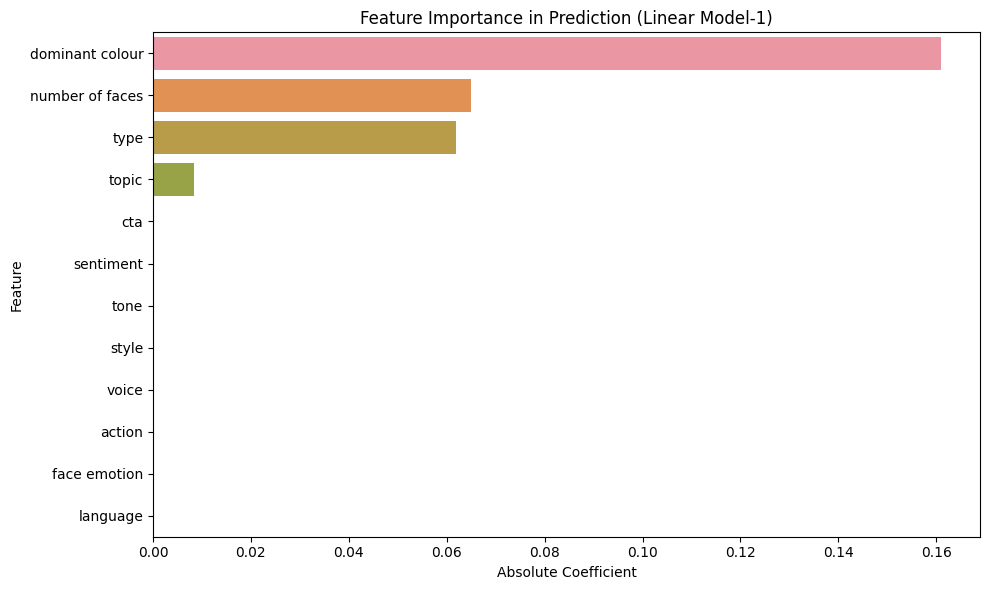

(['dominant colour', 'number of faces', 'type', 'topic', 'cta'],
             feature   coefficient  absolute_coefficient
 4   dominant colour  1.608838e-01          1.608838e-01
 2   number of faces  6.501542e-02          6.501542e-02
 1              type  6.190414e-02          6.190414e-02
 10            topic  8.369243e-03          8.369243e-03
 5               cta  6.162976e-32          6.162976e-32)

In [26]:
import numpy as np

# Get feature coefficients for linear models
coefficients = linear_model.coef_

# Creating a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': coefficients})

# Sorting the DataFrame based on coefficient magnitude
feature_importance_df['absolute_coefficient'] = np.abs(feature_importance_df['coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='absolute_coefficient', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='absolute_coefficient', y='feature', data=feature_importance_df)
plt.title('Feature Importance in Prediction (Linear Model-1)')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Top features based on coefficient magnitude
top_features_linear = feature_importance_df.head(5)
top_features_list_linear = top_features_linear['feature'].tolist()

top_features_list_linear, top_features_linear

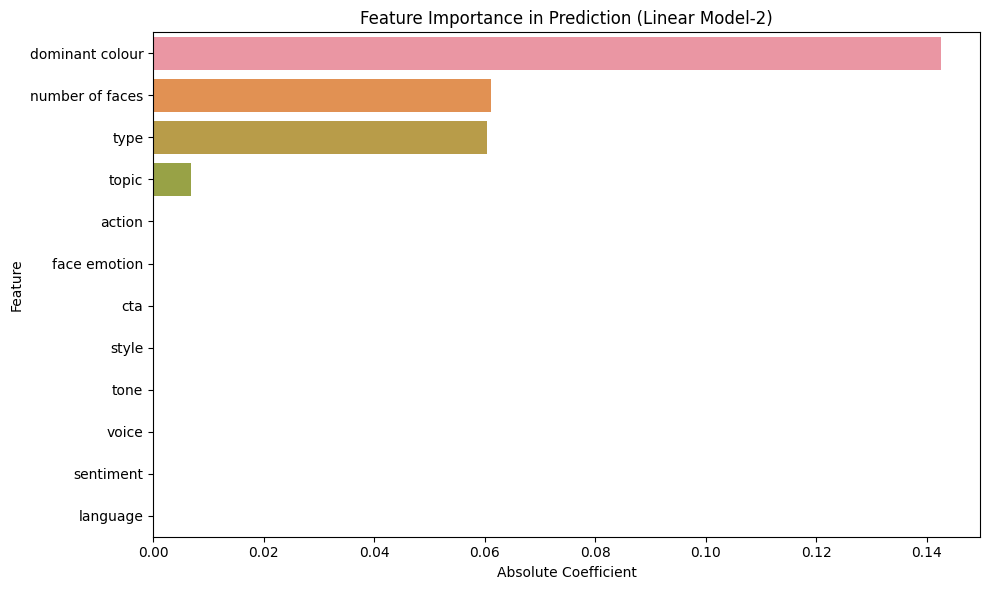

(['dominant colour', 'number of faces', 'type', 'topic', 'action'],
             feature  coefficient  absolute_coefficient
 4   dominant colour     0.142502              0.142502
 2   number of faces     0.061120              0.061120
 1              type     0.060399              0.060399
 10            topic     0.006898              0.006898
 0            action     0.000000              0.000000)

In [27]:
# Get feature coefficients for linear models
coefficients = best_lasso_model.coef_

# Creating a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': coefficients})

# Sorting the DataFrame based on coefficient magnitude
feature_importance_df['absolute_coefficient'] = np.abs(feature_importance_df['coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='absolute_coefficient', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='absolute_coefficient', y='feature', data=feature_importance_df)
plt.title('Feature Importance in Prediction (Linear Model-2)')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Top features based on coefficient magnitude
top_features_linear = feature_importance_df.head(5)
top_features_list_linear = top_features_linear['feature'].tolist()

top_features_list_linear, top_features_linear

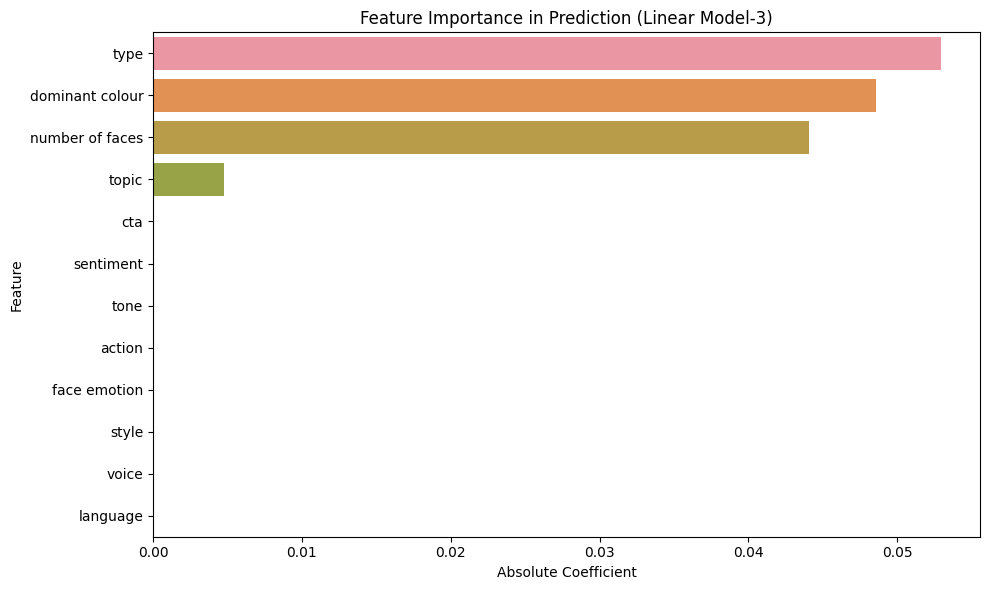

(['type', 'dominant colour', 'number of faces', 'topic', 'cta'],
             feature   coefficient  absolute_coefficient
 1              type  5.291907e-02          5.291907e-02
 4   dominant colour  4.860365e-02          4.860365e-02
 2   number of faces  4.407345e-02          4.407345e-02
 10            topic  4.782835e-03          4.782835e-03
 5               cta  3.389140e-33          3.389140e-33)

In [28]:
# Get feature coefficients for linear models
coefficients = best_ridge_model.coef_

# Creating a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': coefficients})

# Sorting the DataFrame based on coefficient magnitude
feature_importance_df['absolute_coefficient'] = np.abs(feature_importance_df['coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='absolute_coefficient', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='absolute_coefficient', y='feature', data=feature_importance_df)
plt.title('Feature Importance in Prediction (Linear Model-3)')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Top features based on coefficient magnitude
top_features_linear = feature_importance_df.head(5)
top_features_list_linear = top_features_linear['feature'].tolist()

top_features_list_linear, top_features_linear

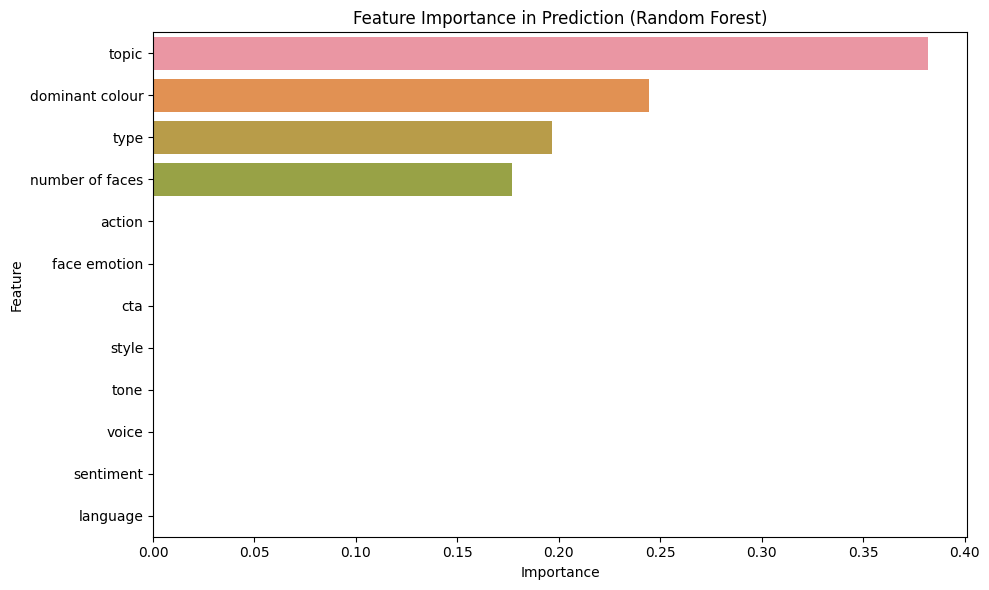

(['topic', 'dominant colour', 'type', 'number of faces', 'action'],
             feature  importance
 10            topic    0.382109
 4   dominant colour    0.244566
 1              type    0.196411
 2   number of faces    0.176914
 0            action    0.000000)

In [29]:
feature_importance_rf = best_rf_model.feature_importances_

# Creating a DataFrame for feature importance
feature_importance_df_rf = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importance_rf})

# Sorting the DataFrame based on importance
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='importance', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df_rf)
plt.title('Feature Importance in Prediction (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Top features based on importance
top_features_rf = feature_importance_df_rf.head(5)
top_features_list_rf = top_features_rf['feature'].tolist()

top_features_list_rf, top_features_rf

**Insights**

1.   Four parameters- dominant color, topic, type, number of faces are of importance in this model.
2.   EDA of data shows the distribution in the dataset with respect to all categorical variables. It also shows the relation between the performance matrix.
3.   Predictive modeling shows that Random Forest followed closely by Neural Network model are the best models for predictive modeling.



**Recommendations**

1.   It is recommended that during campaigning use the dominant colors as well as catchy topic and relevant material in the post.
2.   It is also recommended that hyperparameter tuning and pre-processing the dataset be done correctly and efficiently.
